# TEST

Dummy notebook to test functions

In [1]:
import nbimporter
import prepData as prep
import fitFunc as fits
import Statistics as stat

import matplotlib.pyplot as plt
import numpy as np 

## Test prepData

Import data from example run and prepare it for further analysis.

In [2]:
data,center,length = prep.load_dataset(395)
freq, fft, weights, ref, N = prep.prep_data(data,center, length=length)

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


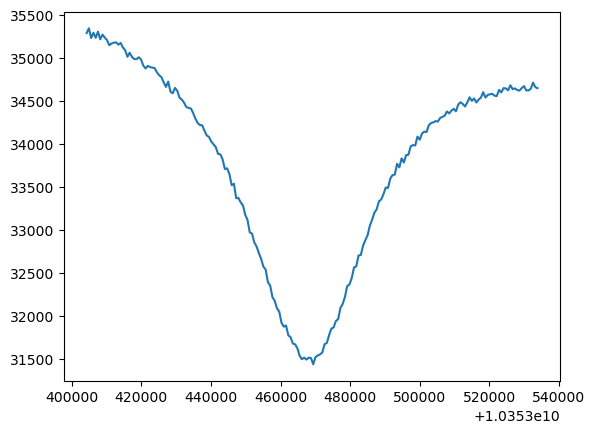

In [3]:
plt.plot(freq, fft)

## Test Fits

### Background Fit

First fit background and check the distribution of residuals.

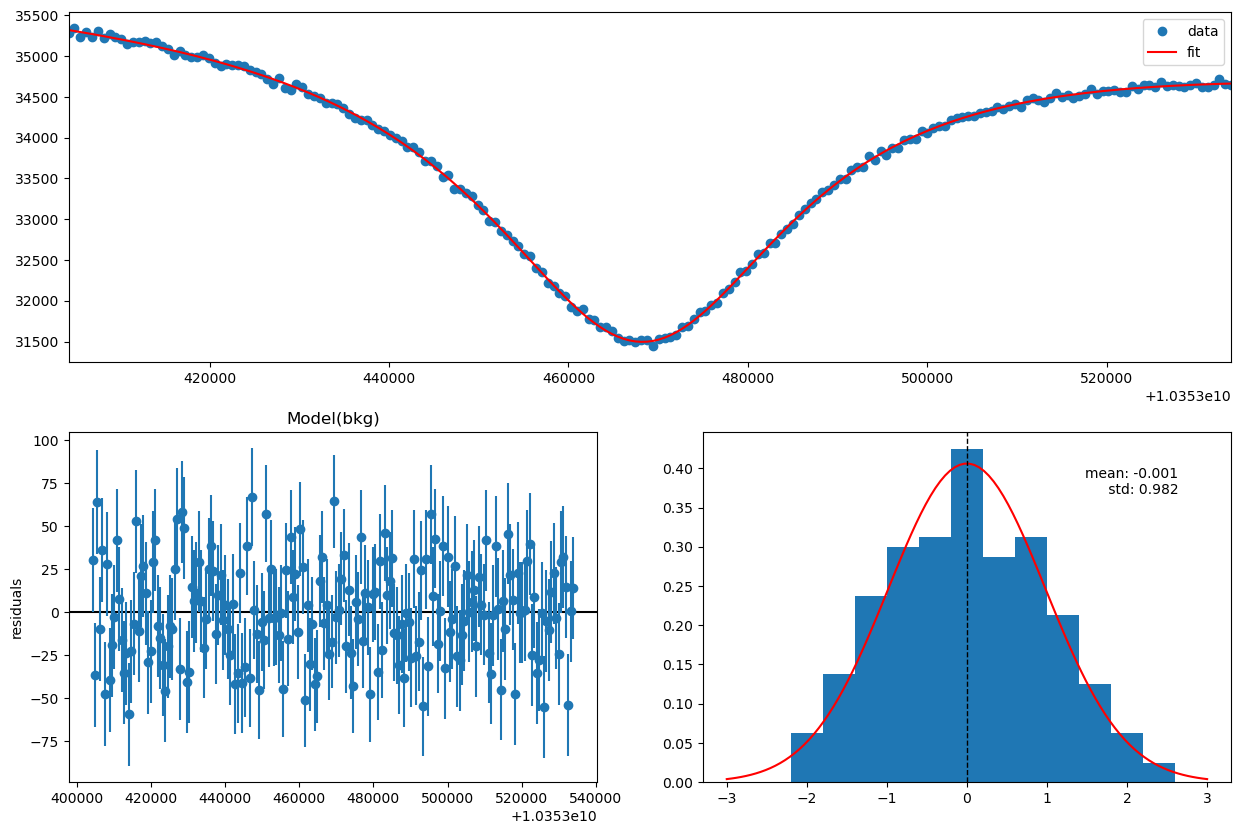

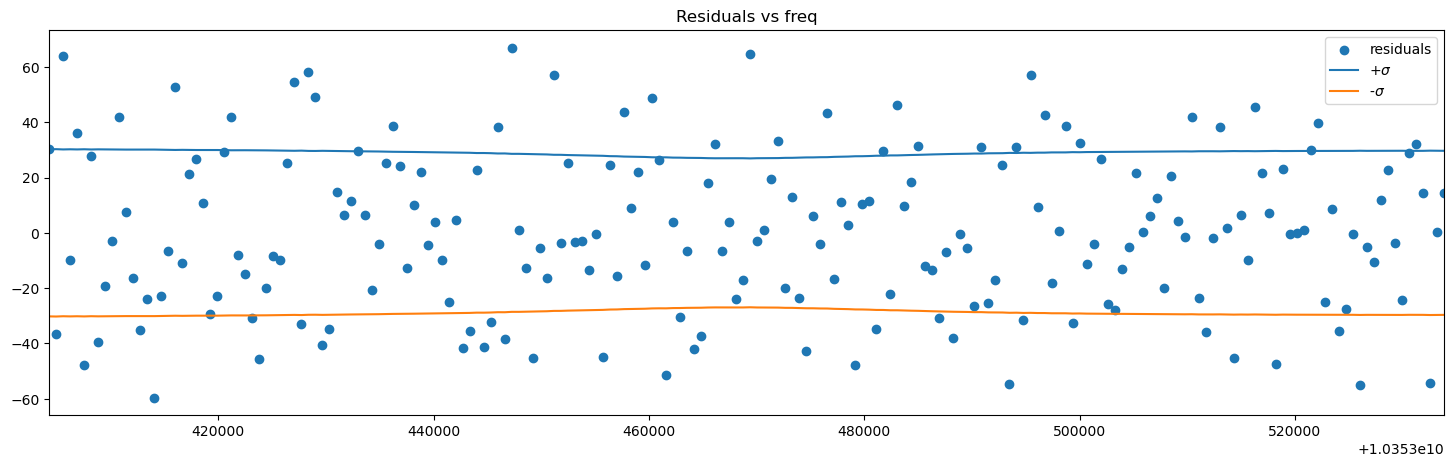

In [4]:
res_bkg = fits.fit_bkg(freq, fft, weights, center, ref)
fits.plot_fit(freq, fft, weights, res_bkg)

### Signal FIt

Fit signal function using every possible frequency as the centre of the signal and check the values of $\mu$ obtained. 

In [5]:
bkg_params = res_bkg.best_values

mu_fit = np.empty(len(freq))
for i in range(len(freq)):
    res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=freq[i],
                           init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
    mu_fit[i] = res_sig.best_values["mu"]

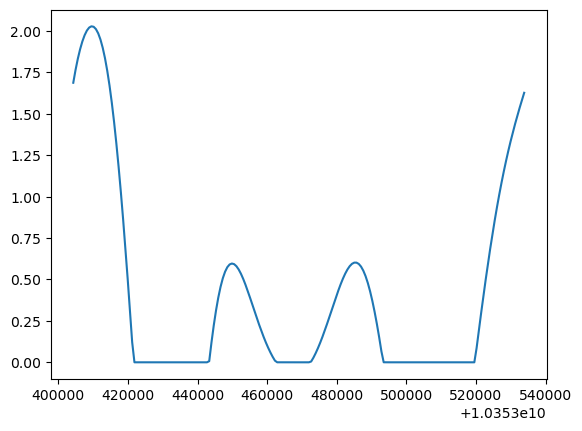

In [6]:
plt.plot(freq, mu_fit)

Check fit results for maximum $\mu$ obtained.

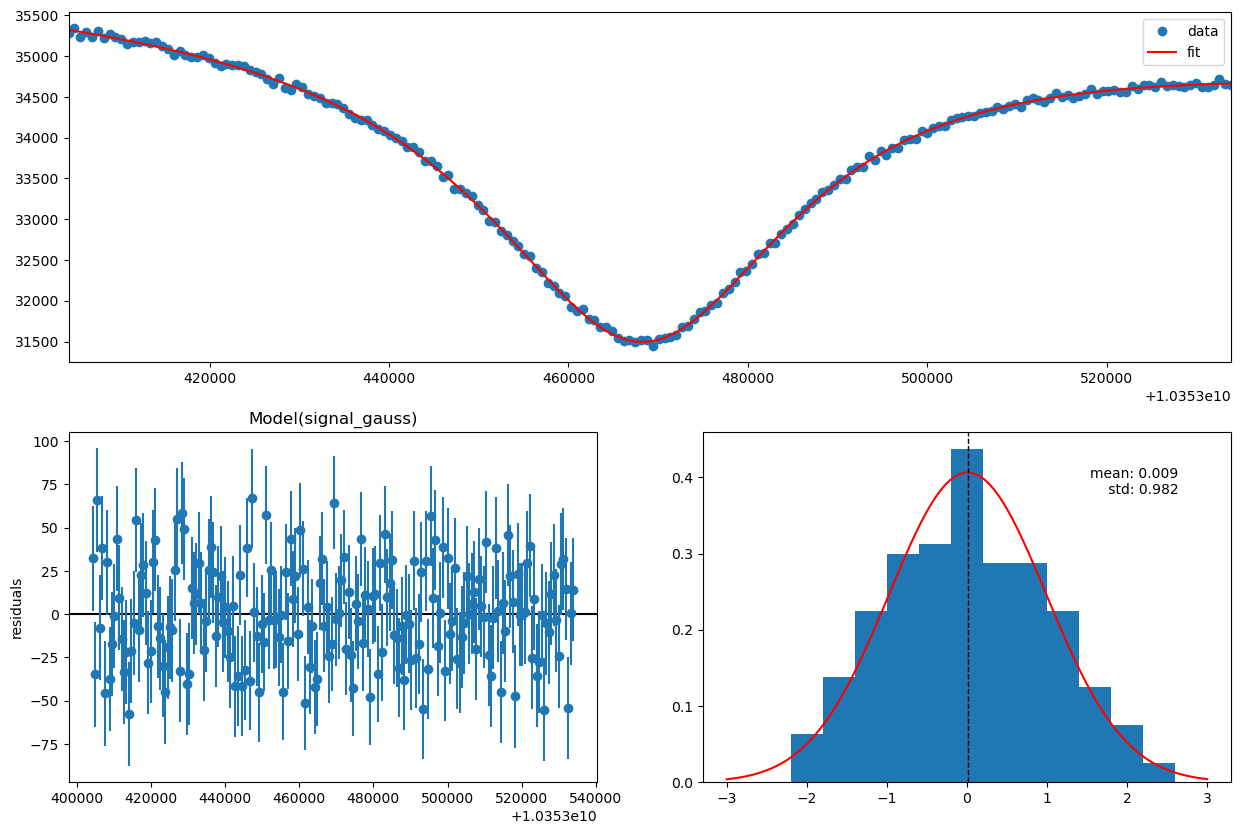

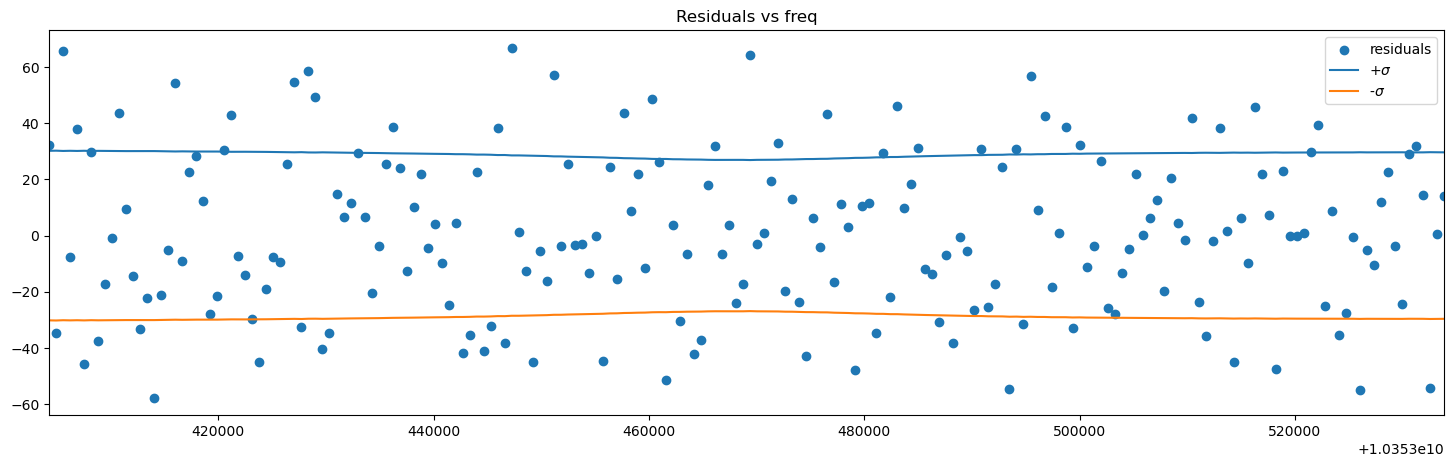

In [7]:
x0_max = freq[np.argmax(mu_fit)]

res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=False)
fits.plot_fit(freq, fft, weights, res_sig)

If you let every parameter vary, the fit does not converge for $\mu$ and it gets stuck on the starting value.

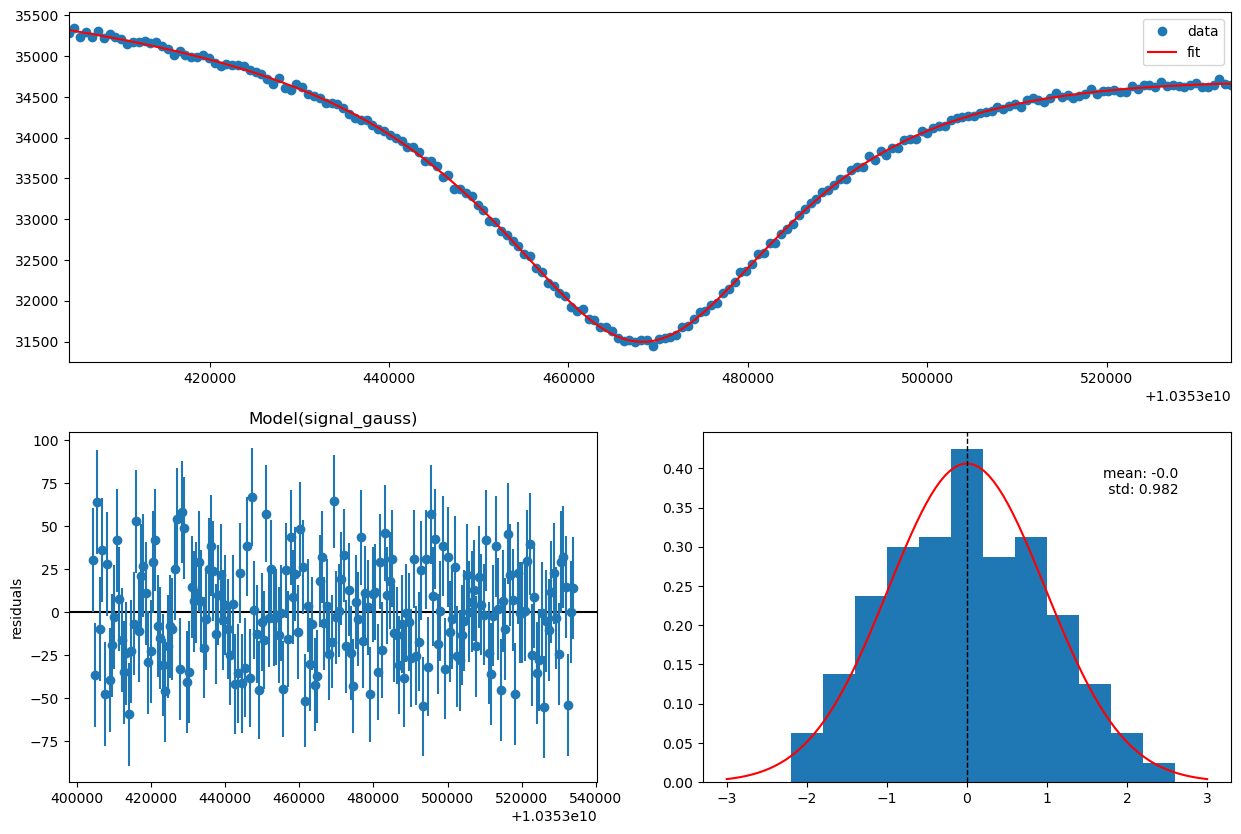

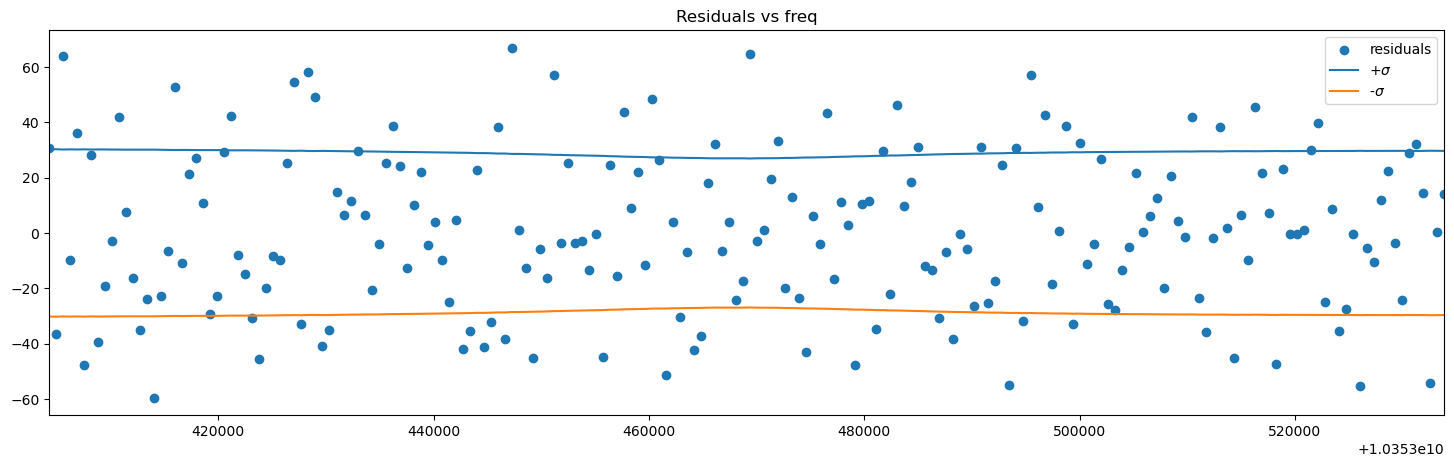

In [8]:
res_sig = fits.fit_sig(x=freq, y=fft, w=weights, x_0=x0_max,
                       init_params=bkg_params, signal=fits.signal_gauss, par_vary=True, mu_init=0.1)
fits.plot_fit(freq, fft, weights, res_sig)

## Test Statistics

Compute likelihood ratio over observed data.

In [9]:
q0_obs = stat.lh_ratio(fft, res_bkg.best_fit, res_sig.best_fit)
q0_obs

0.010000324081829604

### Significance

Compute significance as a function of the center of the signal.

In [10]:
z_tot, _ = stat.stat_test(run=395, x_0=freq, mu_fix=np.array([]),
                          signal=fits.signal_gauss, n_toy=500,
                          calc_z=True, calc_CI=False, draw=False, verbose=False, path='db/')

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Step: 20
Step: 40
Step: 60
Step: 80
Step: 100
Step: 120
Step: 140
Step: 160
Step: 180
Step: 200


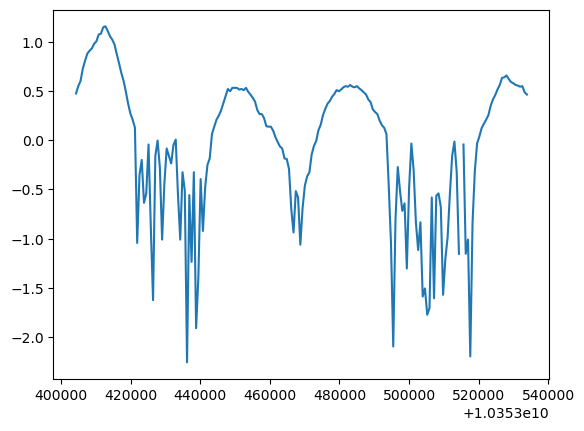

In [11]:
plt.plot(freq, z_tot)

In [12]:
np.max(z_tot), freq[np.argmax(z_tot)]

(1.1552208466119516, 10353412760.416666)

Here are some example of the likelihood ratio distribution for different $x_0$: the maximum value of $\hat{\mu}$, the center of the cavity and a secondary peak of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2


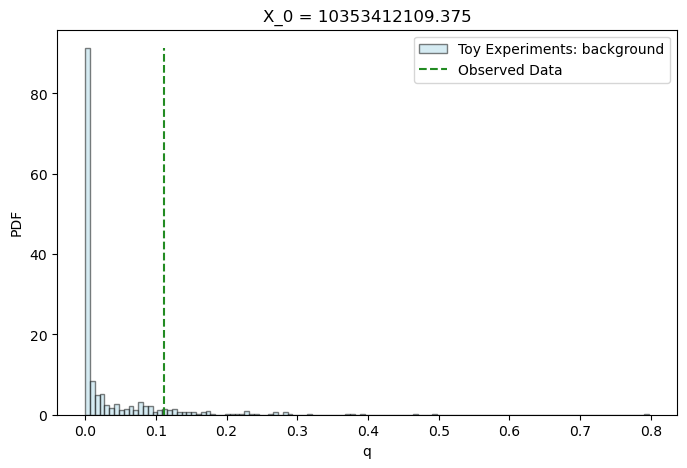

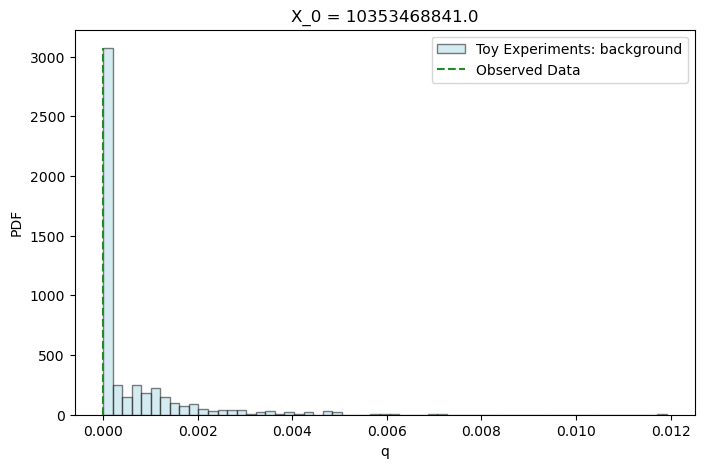

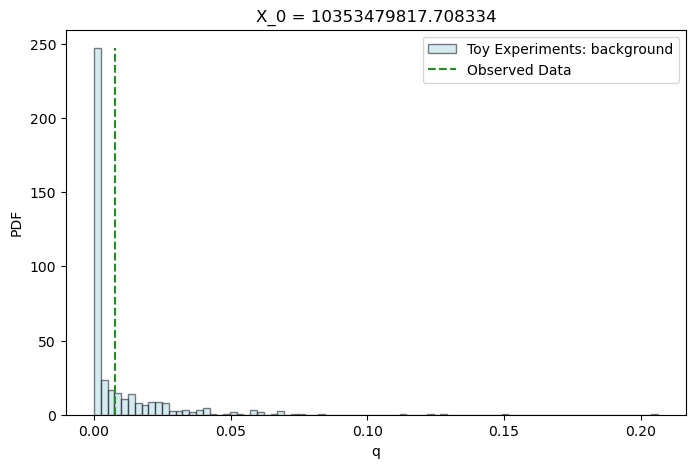

In [13]:
z, _ = stat.stat_test(run=395, x_0=[10353412109.375, center, freq[116]], mu_fix=np.array([]),
                      signal=fits.signal_gauss, n_toy=500,
                      calc_z=True, calc_CI=False, draw=True, verbose=False, path='db/')

In [14]:
z

array([ 1.28155157, -0.88529045,  0.56510845])

### Confidence Interval

Compute $\mu^{95\% CL}$ for the frequency where we have the maximum of $\hat{\mu}$.

Dataset loaded: db/AnalyzedDataFFT_Run_395_sliced.xlsx
Cavity frequency: 10353468841.0 Hz
fft subrun:2
Mu:  80    q(mu)_obs = 98.57932870161221 
p_mu = 0.002   p_b = 0.728   ratio = 0.0027472527472527475 

Mu:  65    q(mu)_obs = 64.43906676185588 
p_mu = 0.004   p_b = 0.728   ratio = 0.005494505494505495 

Mu:  50    q(mu)_obs = 37.512537227976736 
p_mu = 0.042   p_b = 0.728   ratio = 0.057692307692307696 

Mu:  35    q(mu)_obs = 17.814889040239905 
p_mu = 0.146   p_b = 0.728   ratio = 0.20054945054945053 

Mu:  20    q(mu)_obs = 5.361304815617132 
p_mu = 0.308   p_b = 0.728   ratio = 0.4230769230769231 



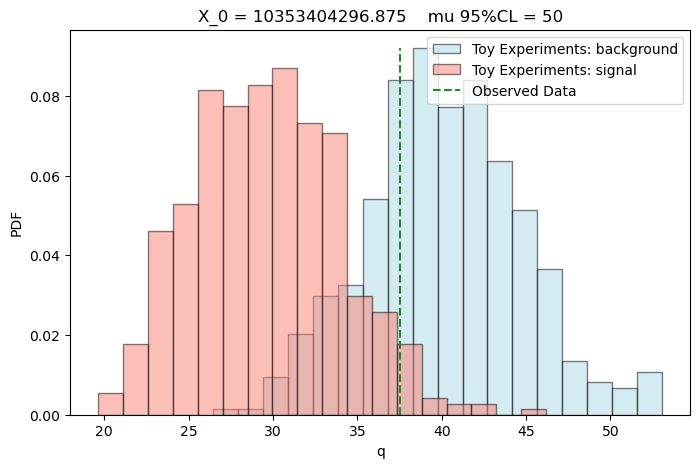

Mu:  80    q(mu)_obs = 188.52992783351897 
p_mu = 0.0   p_b = 0.738   ratio = 0.0 

Mu:  65    q(mu)_obs = 123.6312560903666 
p_mu = 0.002   p_b = 0.74   ratio = 0.002702702702702703 

Mu:  50    q(mu)_obs = 72.34240519836203 
p_mu = 0.016   p_b = 0.74   ratio = 0.021621621621621623 

Mu:  35    q(mu)_obs = 34.692575416192994 
p_mu = 0.108   p_b = 0.74   ratio = 0.14594594594594595 

Mu:  20    q(mu)_obs = 10.711032487158263 
p_mu = 0.328   p_b = 0.74   ratio = 0.44324324324324327 



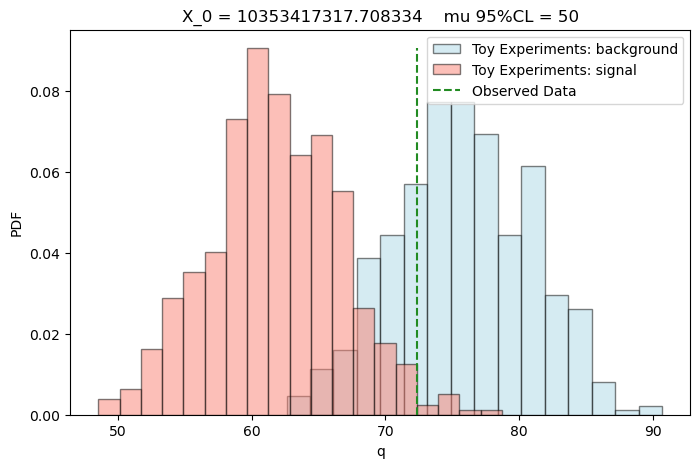

Mu:  80    q(mu)_obs = 217.00557758574837 
p_mu = 0.0   p_b = 0.192   ratio = 0.0 

Mu:  65    q(mu)_obs = 144.87136377388947 
p_mu = 0.0   p_b = 0.192   ratio = 0.0 

Mu:  50    q(mu)_obs = 87.21627918198601 
p_mu = 0.0   p_b = 0.194   ratio = 0.0 

Mu:  35    q(mu)_obs = 44.071113715706815 
p_mu = 0.0   p_b = 0.194   ratio = 0.0 

Mu:  20    q(mu)_obs = 15.466726678732357 
p_mu = 0.01   p_b = 0.192   ratio = 0.052083333333333336 



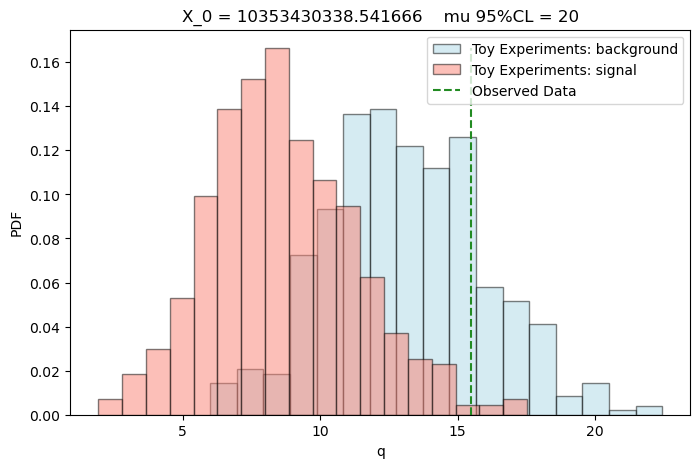

Mu:  80    q(mu)_obs = 217.23249361601643 
p_mu = 0.0   p_b = 0.494   ratio = 0.0 

Mu:  65    q(mu)_obs = 143.4459136186531 
p_mu = 0.002   p_b = 0.496   ratio = 0.004032258064516129 

Mu:  50    q(mu)_obs = 84.87884078794741 
p_mu = 0.014   p_b = 0.496   ratio = 0.028225806451612902 

Mu:  35    q(mu)_obs = 41.564417721658174 
p_mu = 0.076   p_b = 0.498   ratio = 0.15261044176706828 

Mu:  20    q(mu)_obs = 13.535863512045125 
p_mu = 0.178   p_b = 0.498   ratio = 0.357429718875502 



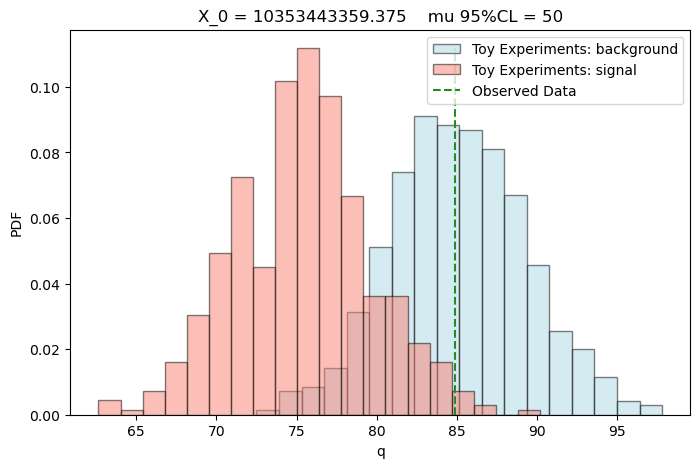

Mu:  80    q(mu)_obs = 231.9617979053446 
p_mu = 0.026   p_b = 0.632   ratio = 0.04113924050632911 

Mu:  65    q(mu)_obs = 152.90458989599756 
p_mu = 0.064   p_b = 0.632   ratio = 0.10126582278481013 

Mu:  50    q(mu)_obs = 90.22079010665743 
p_mu = 0.19   p_b = 0.632   ratio = 0.30063291139240506 

Mu:  35    q(mu)_obs = 43.94757917025095 
p_mu = 0.288   p_b = 0.63   ratio = 0.45714285714285713 

Mu:  20    q(mu)_obs = 14.122227202115027 
p_mu = 0.45   p_b = 0.63   ratio = 0.7142857142857143 



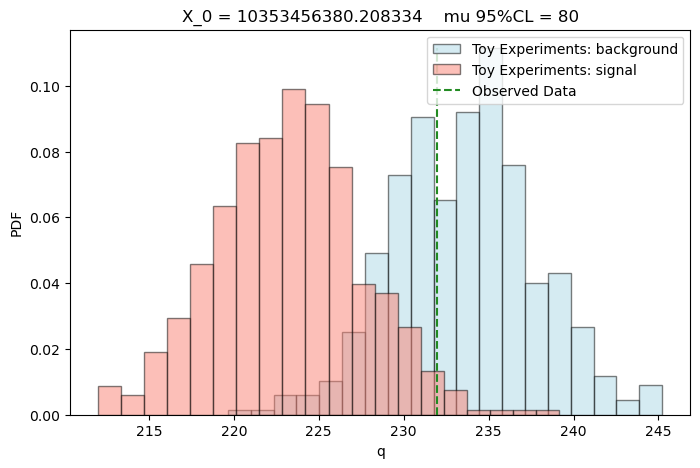

Mu:  80    q(mu)_obs = 243.29790286236334 
p_mu = 0.014   p_b = 0.312   ratio = 0.04487179487179487 

Mu:  65    q(mu)_obs = 160.74262266095297 
p_mu = 0.044   p_b = 0.312   ratio = 0.14102564102564102 

Mu:  50    q(mu)_obs = 95.19107252889398 
p_mu = 0.092   p_b = 0.314   ratio = 0.2929936305732484 

Mu:  35    q(mu)_obs = 46.68286797626047 
p_mu = 0.21   p_b = 0.314   ratio = 0.6687898089171974 

Mu:  20    q(mu)_obs = 15.257722416660954 
p_mu = 0.222   p_b = 0.316   ratio = 0.7025316455696202 



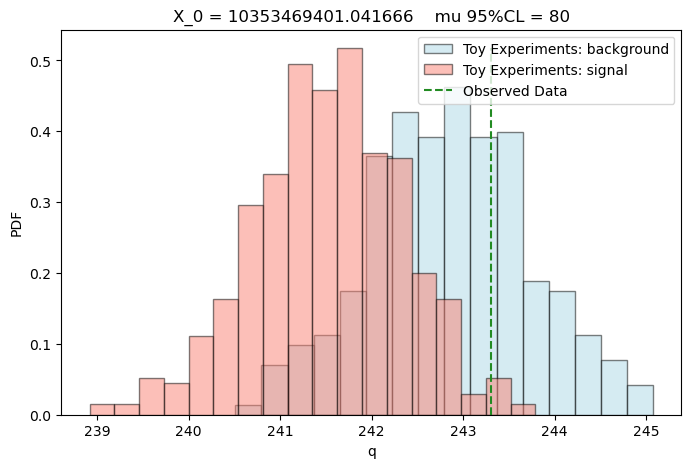

Mu:  80    q(mu)_obs = 228.09227738097275 
p_mu = 0.042   p_b = 0.734   ratio = 0.05722070844686649 

Mu:  65    q(mu)_obs = 150.16760278651077 
p_mu = 0.082   p_b = 0.734   ratio = 0.111716621253406 

Mu:  50    q(mu)_obs = 88.42993579307836 
p_mu = 0.178   p_b = 0.732   ratio = 0.24316939890710382 

Mu:  35    q(mu)_obs = 42.915745148980704 
p_mu = 0.318   p_b = 0.73   ratio = 0.4356164383561644 

Mu:  20    q(mu)_obs = 13.661586669835287 
p_mu = 0.51   p_b = 0.73   ratio = 0.6986301369863014 



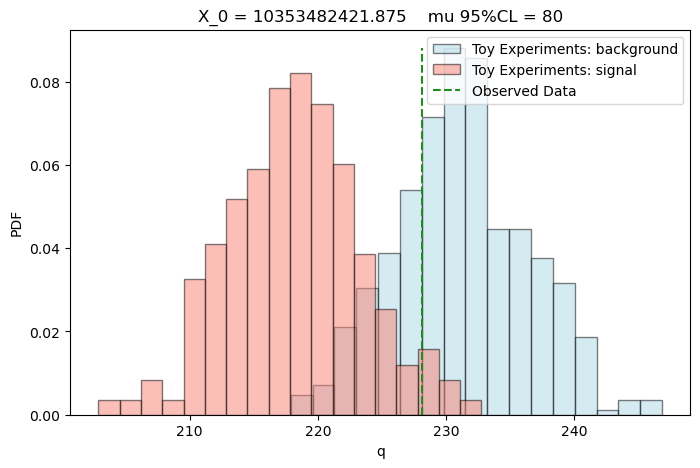

Mu:  80    q(mu)_obs = 218.342828434824 
p_mu = 0.0   p_b = 0.446   ratio = 0.0 

Mu:  65    q(mu)_obs = 144.45866527578687 
p_mu = 0.0   p_b = 0.446   ratio = 0.0 

Mu:  50    q(mu)_obs = 85.74315498023861 
p_mu = 0.006   p_b = 0.446   ratio = 0.013452914798206279 

Mu:  35    q(mu)_obs = 42.2292631083842 
p_mu = 0.038   p_b = 0.446   ratio = 0.08520179372197309 

Mu:  20    q(mu)_obs = 13.950031158372212 
p_mu = 0.15   p_b = 0.446   ratio = 0.3363228699551569 



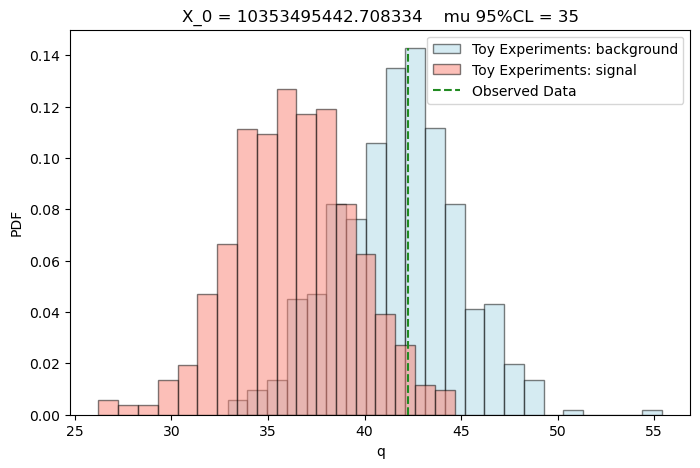

Mu:  80    q(mu)_obs = 216.5910219551049 
p_mu = 0.0   p_b = 0.28   ratio = 0.0 

Mu:  65    q(mu)_obs = 144.1665544147429 
p_mu = 0.0   p_b = 0.28   ratio = 0.0 

Mu:  50    q(mu)_obs = 86.39044355049396 
p_mu = 0.0   p_b = 0.28   ratio = 0.0 

Mu:  35    q(mu)_obs = 43.29402802746131 
p_mu = 0.0   p_b = 0.28   ratio = 0.0 

Mu:  20    q(mu)_obs = 14.908717568657721 
p_mu = 0.016   p_b = 0.28   ratio = 0.05714285714285714 



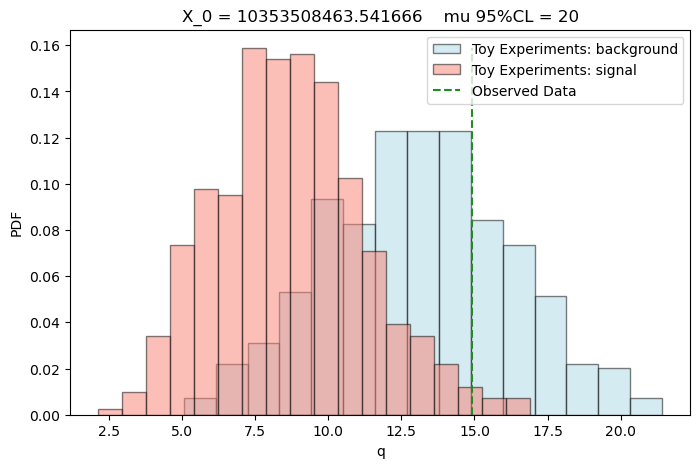

Mu:  80    q(mu)_obs = 196.21045283458943 
p_mu = 0.0   p_b = 0.536   ratio = 0.0 

Mu:  65    q(mu)_obs = 129.36800255750313 
p_mu = 0.0   p_b = 0.536   ratio = 0.0 

Mu:  50    q(mu)_obs = 76.36289166715346 
p_mu = 0.002   p_b = 0.536   ratio = 0.0037313432835820895 

Mu:  35    q(mu)_obs = 37.22529996461003 
p_mu = 0.03   p_b = 0.536   ratio = 0.05597014925373134 

Mu:  20    q(mu)_obs = 11.985475942086623 
p_mu = 0.188   p_b = 0.536   ratio = 0.3507462686567164 



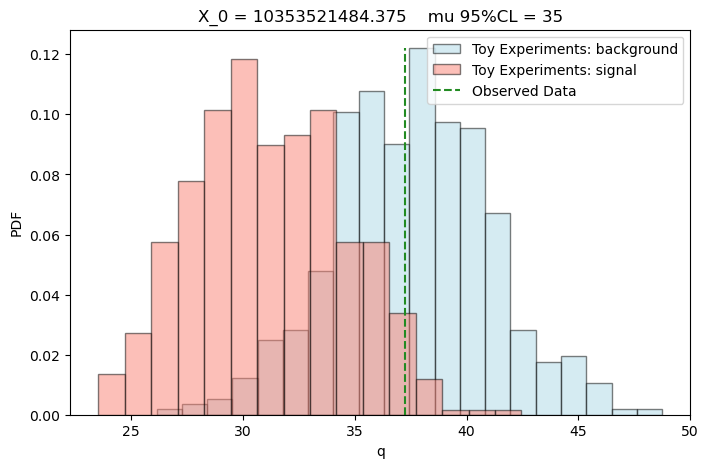

In [16]:
mu_fix = np.array([80, 65, 50, 35, 20])

_, muCI = stat.stat_test(run=395, x_0=freq[range(0, 200, 20)].values, mu_fix=mu_fix,
                         signal=fits.signal_gauss, n_toy=500,
                         calc_z=False, calc_CI=True, draw=True, verbose=True, path='db/')

In [17]:
muCI

array([50., 50., 20., 50., 80., 80., 80., 35., 20., 35.])

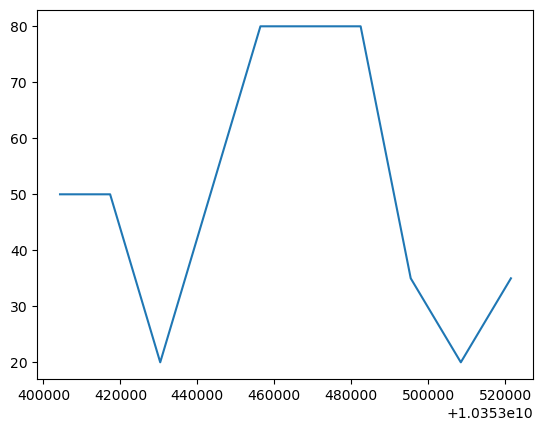

In [18]:
plt.plot(freq[range(0, 200, 20)].values, muCI)